# 1 - Setup

## 1.1 - Imports & Configs

In [1]:
from utils import *

## 1.2 - Constants & Globals

In [51]:
OUTPUT_CSV = "./output/csv/"
OUTPUT_GRAPH = "./output/graph/"
# Dataset limpo
DF_CLEAN = pd.read_csv("./output/csv/data_clean.csv")

# 2 - Visão Geral

In [6]:
df_work = DF_CLEAN.copy()

## 2.1 - Pergunta 13: Os profissionais da área de dados estão trabalhando em qual modalidade?
O modelo de trabalho mais comum entre os profissionais da área de dados neste dataset é o **100% Remoto.**

In [ ]:
df_filtered = df_work[~df_work["P2_a Qual sua situação atual de trabalho?"].isin([
    "Desempregado, buscando recolocação",
    "Desempregado e não estou buscando recolocação",
    "Prefiro não informar"
])]
df_by_work_model = df_filtered[["P0 id", "P2_a Qual sua situação atual de trabalho?", "P2_f Cargo Atual", "P2_r Atualmente qual a sua forma de trabalho?"]].groupby(["P2_r Atualmente qual a sua forma de trabalho?", "P2_f Cargo Atual"]).size().reset_index(name="count")


In [46]:
fig = df_by_work_model[~df_by_work_model["P2_f Cargo Atual"].isin([
    "Outra Opção",
    "Outras Engenharias (não inclui dev)",
    "Professor/Pesquisador",
    "Desenvolvedor/ Engenheiro de Software/ Analista de Sistemas",
    "Economista"
])].groupby("P2_r Atualmente qual a sua forma de trabalho?").sum().reset_index()
fig = fig.drop(columns=["P2_f Cargo Atual"])
fig = fig.replace({"P2_r Atualmente qual a sua forma de trabalho?": {r"Modelo híbrido flexível.*": "Modelo híbrido flexível"}}, regex=True)
fig



,P2_r Atualmente qual a sua forma de trabalho?,count
0,Modelo 100% presencial,447
1,Modelo 100% remoto,1727
2,Modelo híbrido com dias fixos de trabalho pres...,568
3,Modelo híbrido flexível,680


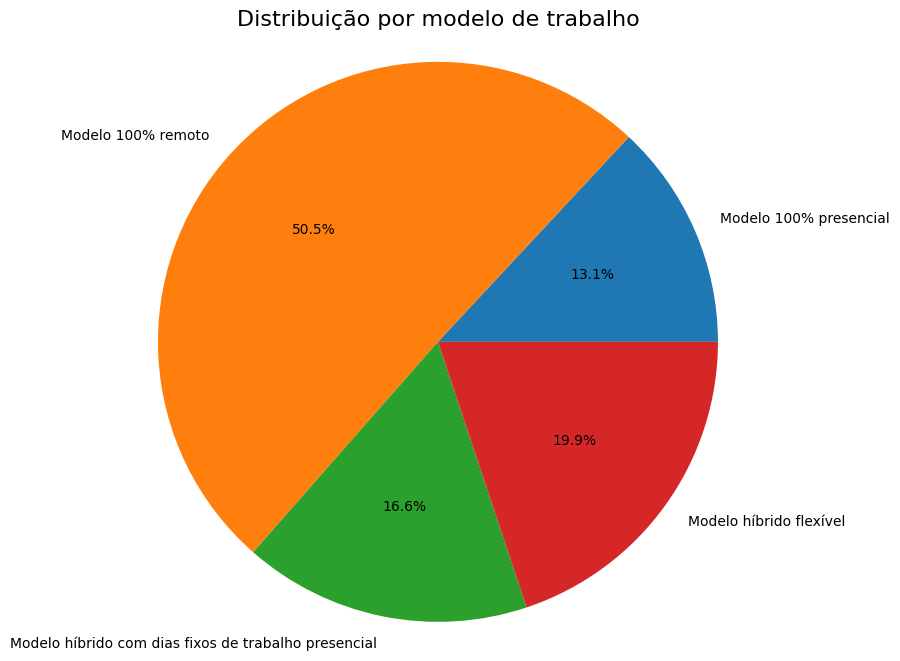

In [59]:
plt.figure(figsize=(10, 8))
plt.pie(fig["count"], labels=fig["P2_r Atualmente qual a sua forma de trabalho?"], autopct='%1.1f%%')
plt.title("Distribuição por modelo de trabalho", fontsize=16)
plt.axis("equal")
plt.savefig(OUTPUT_GRAPH+"pie_modelo_trabalho.png")
plt.show()

## 2.2 - Pergunta 3: Qual o nível de inglês predominante entre os profissionais mais experientes?
No dataset não há menções ao nível de inglês, porem

In [61]:
df_abroad = DF_CLEAN[DF_CLEAN["P2_a Qual sua situação atual de trabalho?"].isin(["Vivo fora do Brasil e trabalho para empresa de fora do Brasil", "Vivo no Brasil e trabalho para empresa de fora do Brasil"])]
df_abroad

,P0 id,P1_a Idade,P1_a_1 Faixa idade,P1_b Genero,P1_c Cor/raca/etnia,P1_d PCD,P1_e_2 Experiencia prejudicada devido a minha Cor Raça Etnia,P1_e_3 Experiencia prejudicada devido a minha identidade de gênero,P1_e_4 Experiencia prejudicada devido ao fato de ser PCD,P1_f_1 Quantidade de oportunidades de emprego/vagas recebidas,...,"P8_d_3 Entrando em contato com os times de negócio para definição do problema, identificar a solução e apresentação de resultados.",P8_d_4 Desenvolvendo modelos de Machine Learning com o objetivo de colocar em produção em sistemas (produtos de dados).,"P8_d_5 Colocando modelos em produção, criando os pipelines de dados, APIs de consumo e monitoramento.","P8_d_6 Cuidando da manutenção de modelos de Machine Learning já em produção, atuando no monitoramento, ajustes e refatoração quando necessário.","P8_d_7 Realizando construções de dashboards em ferramentas de BI como PowerBI, Tableau, Looker, Qlik, etc.","P8_d_8 Utilizando ferramentas avançadas de estatística como SAS, SPSS, Stata etc, para realizar análises.","P8_d_9 Criando e dando manutenção em ETLs, DAGs e automações de pipelines de dados.",P8_d_10 Criando e gerenciando soluções de Feature Store e cultura de MLOps.,"P8_d_11 Criando e mantendo a infra que meus modelos e soluções rodam (clusters, servidores, API, containers, etc.)",P8_d_12 Treinando e aplicando LLM
122,0sg4y3cvdcrbe0sgrq7glk1l8ky7rrq7,37,35-39,Masculino,Branca,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
149,0yuwrhed0dsnrkdgy5n0yuwrhdx09xly,45,45-49,Masculino,Preta,0,0.0,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
194,18o6p3cbidf2joqwcv7218o6p3ah4k0h,41,40-44,Masculino,Branca,0,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
428,2ufrsx2xgu0qtnomn02ufef6b6ln69c2,38,35-39,Masculino,Branca,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
449,2yfshhlv4ax9swrzrh52yfshs5advvb0,31,30-34,Feminino,Parda,0,1.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4808,wsk4hyg8xo73k81wsk4rytrt3ibpk0bw,26,25-29,Masculino,Branca,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4873,x948p21jav2afcsgrknhx948p21cemkh,31,30-34,Masculino,Amarela,0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5157,z588pipmhkc61giobzz588pojz420ygj,31,30-34,Masculino,Branca,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5165,z6nlq8bg3dc37m1cfx8ez6nlq8n252w6,30,30-34,Masculino,Branca,0,NaN,NaN,NaN,NaN,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# 2 - Visão DA

In [8]:
# Criar df apenas de analistas de dados
df_targets = df_work[df_work["P2_f Cargo Atual"] == "Analista de Dados/Data Analyst"]
df_targets = df_targets.dropna(axis=1, how='all')
df_targets.shape

(907, 260)

In [ ]:
df_targets.to_csv(OUTPUT_CSV+"data_dataAnalysts.csv", index=False)

## 4.2 - Visão gestores

In [ ]:
# Criar dataset apenas de gestores
df_heads = df_work[df_work["P2_d Gestor?"] == 1.0]
df_heads = df_heads.dropna(axis=1, how='all')
df_heads.shape

(896, 70)

In [ ]:
df_heads.to_csv(OUTPUT_CSV+"data_gestores.csv", index=False)